In [1]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier  
from sklearn.tree import DecisionTreeRegressor   
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

#Preprocessing 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split 

#Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 

#Evalution
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [2]:
df=pd.read_csv("E:/DEPI/ai_job_dataset.csv")
print(df.shape)

(15000, 19)


In [3]:
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [5]:
df.isnull().sum()

job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64

In [6]:
df.drop(columns=['job_id',"company_name","salary_currency"], inplace=True)
df.drop(columns=["industry"], inplace=True)
df.drop(columns=["required_skills"], inplace=True)

In [7]:
# 1. تحويل العمود إلى datetime
df['posting_date'] = pd.to_datetime(df['posting_date'], errors='coerce')

# 2. استخراج خصائص مفيدة منه
df['posting_year'] = df['posting_date'].dt.year
df['posting_month'] = df['posting_date'].dt.month
df['posting_day'] = df['posting_date'].dt.day
df['posting_dayofweek'] = df['posting_date'].dt.dayofweek  # 0=Monday, 6=Sunday
df['posting_dayofyear'] = df['posting_date'].dt.dayofyear

# 3. حذف العمود الأصلي لأنه ما ينفع يدخل في regression كـ datetime
df.drop(columns=['posting_date'], inplace=True)

In [8]:
df.head()

,job_title,salary_usd,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,education_required,years_experience,application_deadline,job_description_length,benefits_score,posting_year,posting_month,posting_day,posting_dayofweek,posting_dayofyear
0,AI Research Scientist,90376,SE,CT,China,M,China,50,Bachelor,9,2024-11-07,1076,5.9,2024,10,18,4,292
1,AI Software Engineer,61895,EN,CT,Canada,M,Ireland,100,Master,1,2025-01-11,1268,5.2,2024,11,20,2,325
2,AI Specialist,152626,MI,FL,Switzerland,L,South Korea,0,Associate,2,2025-04-07,1974,9.4,2025,3,18,1,77
3,NLP Engineer,80215,SE,FL,India,M,India,50,PhD,7,2025-02-24,1345,8.6,2024,12,23,0,358
4,AI Consultant,54624,EN,PT,France,S,Singapore,100,Master,0,2025-06-23,1989,6.6,2025,4,15,1,105


In [9]:
df.nunique()


job_title                    20
salary_usd                14315
experience_level              4
employment_type               4
company_location             20
company_size                  3
employee_residence           20
remote_ratio                  3
education_required            4
years_experience             20
application_deadline        543
job_description_length     2000
benefits_score               51
posting_year                  2
posting_month                12
posting_day                  31
posting_dayofweek             7
posting_dayofyear           366
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_title               15000 non-null  object 
 1   salary_usd              15000 non-null  int64  
 2   experience_level        15000 non-null  object 
 3   employment_type         15000 non-null  object 
 4   company_location        15000 non-null  object 
 5   company_size            15000 non-null  object 
 6   employee_residence      15000 non-null  object 
 7   remote_ratio            15000 non-null  int64  
 8   education_required      15000 non-null  object 
 9   years_experience        15000 non-null  int64  
 10  application_deadline    15000 non-null  object 
 11  job_description_length  15000 non-null  int64  
 12  benefits_score          15000 non-null  float64
 13  posting_year            15000 non-null  int32  
 14  posting_month           15000 non-null

In [11]:
# With the help of for loop, we will now check if there are any types in the categorical columns or not
for col in df.select_dtypes(include = "object"):
    print(f"Column name: {col}")
    print(df[col].unique())
    print('\n', '-'*80, '\n')

Column name: job_title
['AI Research Scientist' 'AI Software Engineer' 'AI Specialist'
 'NLP Engineer' 'AI Consultant' 'AI Architect' 'Principal Data Scientist'
 'Data Analyst' 'Autonomous Systems Engineer' 'AI Product Manager'
 'Machine Learning Engineer' 'Data Engineer' 'Research Scientist'
 'ML Ops Engineer' 'Robotics Engineer' 'Head of AI'
 'Deep Learning Engineer' 'Data Scientist' 'Machine Learning Researcher'
 'Computer Vision Engineer']

 -------------------------------------------------------------------------------- 

Column name: experience_level
['SE' 'EN' 'MI' 'EX']

 -------------------------------------------------------------------------------- 

Column name: employment_type
['CT' 'FL' 'PT' 'FT']

 -------------------------------------------------------------------------------- 

Column name: company_location
['China' 'Canada' 'Switzerland' 'India' 'France' 'Germany'
 'United Kingdom' 'Singapore' 'Austria' 'Sweden' 'South Korea' 'Norway'
 'Netherlands' 'United States' 'I

In [12]:
from sklearn.preprocessing import LabelEncoder

obj_cols = df.select_dtypes(include='object').columns

le = LabelEncoder()

for col in obj_cols:
    df[col] = le.fit_transform(df[col])


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_title               15000 non-null  int32  
 1   salary_usd              15000 non-null  int64  
 2   experience_level        15000 non-null  int32  
 3   employment_type         15000 non-null  int32  
 4   company_location        15000 non-null  int32  
 5   company_size            15000 non-null  int32  
 6   employee_residence      15000 non-null  int32  
 7   remote_ratio            15000 non-null  int64  
 8   education_required      15000 non-null  int32  
 9   years_experience        15000 non-null  int64  
 10  application_deadline    15000 non-null  int32  
 11  job_description_length  15000 non-null  int64  
 12  benefits_score          15000 non-null  float64
 13  posting_year            15000 non-null  int32  
 14  posting_month           15000 non-null

In [14]:
df.describe()

,job_title,salary_usd,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,education_required,years_experience,application_deadline,job_description_length,benefits_score,posting_year,posting_month,posting_day,posting_dayofweek,posting_dayofyear
count,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,9.523667,115348.965133,1.50300,1.500600,9.419933,1.000600,9.463667,49.483333,1.487933,6.253200,269.913467,1503.314733,7.504273,2024.244533,5.513067,15.727133,2.982733,152.868067
std,5.771926,60260.940438,1.11562,1.113889,5.749370,0.816728,5.766960,40.812712,1.115798,5.545768,141.630159,576.127083,1.450870,0.429824,3.498625,8.777377,2.002541,107.075516
min,0.000000,32519.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,5.000000,2024.000000,1.000000,1.000000,0.000000,1.000000
25%,4.000000,70179.750000,1.00000,1.000000,4.000000,0.000000,4.000000,0.000000,0.000000,2.000000,149.000000,1003.750000,6.200000,2024.000000,3.000000,8.000000,1.000000,61.000000
50%,10.000000,99705.000000,2.00000,2.000000,9.000000,1.000000,9.000000,50.000000,1.000000,5.000000,270.000000,1512.000000,7.500000,2024.000000,5.000000,16.000000,3.000000,123.000000
75%,15.000000,146408.500000,2.00000,2.000000,14.000000,2.000000,15.000000,100.000000,2.000000,10.000000,391.000000,2000.000000,8.800000,2024.000000,8.000000,23.000000,5.000000,244.000000
max,19.000000,399095.000000,3.00000,3.000000,19.000000,2.000000,19.000000,100.000000,3.000000,19.000000,542.000000,2499.000000,10.000000,2025.000000,12.000000,31.000000,6.000000,366.000000


In [15]:
df.head()

,job_title,salary_usd,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,education_required,years_experience,application_deadline,job_description_length,benefits_score,posting_year,posting_month,posting_day,posting_dayofweek,posting_dayofyear
0,3,90376,3,0,3,1,3,50,1,9,296,1076,5.9,2024,10,18,4,292
1,4,61895,0,0,2,1,9,100,2,1,361,1268,5.2,2024,11,20,2,325
2,5,152626,2,1,17,0,15,0,0,2,447,1974,9.4,2025,3,18,1,77
3,16,80215,3,1,8,1,8,50,3,7,405,1345,8.6,2024,12,23,0,358
4,1,54624,0,3,6,2,14,100,2,0,524,1989,6.6,2025,4,15,1,105


In [16]:
# ثم حذف الأعمدة الأصلية
X = df.drop(columns=['salary_usd', 'application_deadline'])
X

,job_title,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,education_required,years_experience,job_description_length,benefits_score,posting_year,posting_month,posting_day,posting_dayofweek,posting_dayofyear
0,3,3,0,3,1,3,50,1,9,1076,5.9,2024,10,18,4,292
1,4,0,0,2,1,9,100,2,1,1268,5.2,2024,11,20,2,325
2,5,2,1,17,0,15,0,0,2,1974,9.4,2025,3,18,1,77
3,16,3,1,8,1,8,50,3,7,1345,8.6,2024,12,23,0,358
4,1,0,3,6,2,14,100,2,0,1989,6.6,2025,4,15,1,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,19,0,1,5,2,5,50,1,1,1635,7.9,2025,2,6,3,37
14996,15,0,0,18,1,18,0,2,0,1624,8.2,2024,10,16,2,290
14997,16,1,0,15,0,15,50,0,17,1336,7.4,2024,3,19,1,79
14998,12,0,2,12,1,12,0,3,1,1935,5.6,2024,3,22,4,82


In [17]:
y = df[['salary_usd']]
y

,salary_usd
0,90376
1,61895
2,152626
3,80215
4,54624
...,...
14995,38604
14996,57811
14997,189490
14998,79461


<Axes: >

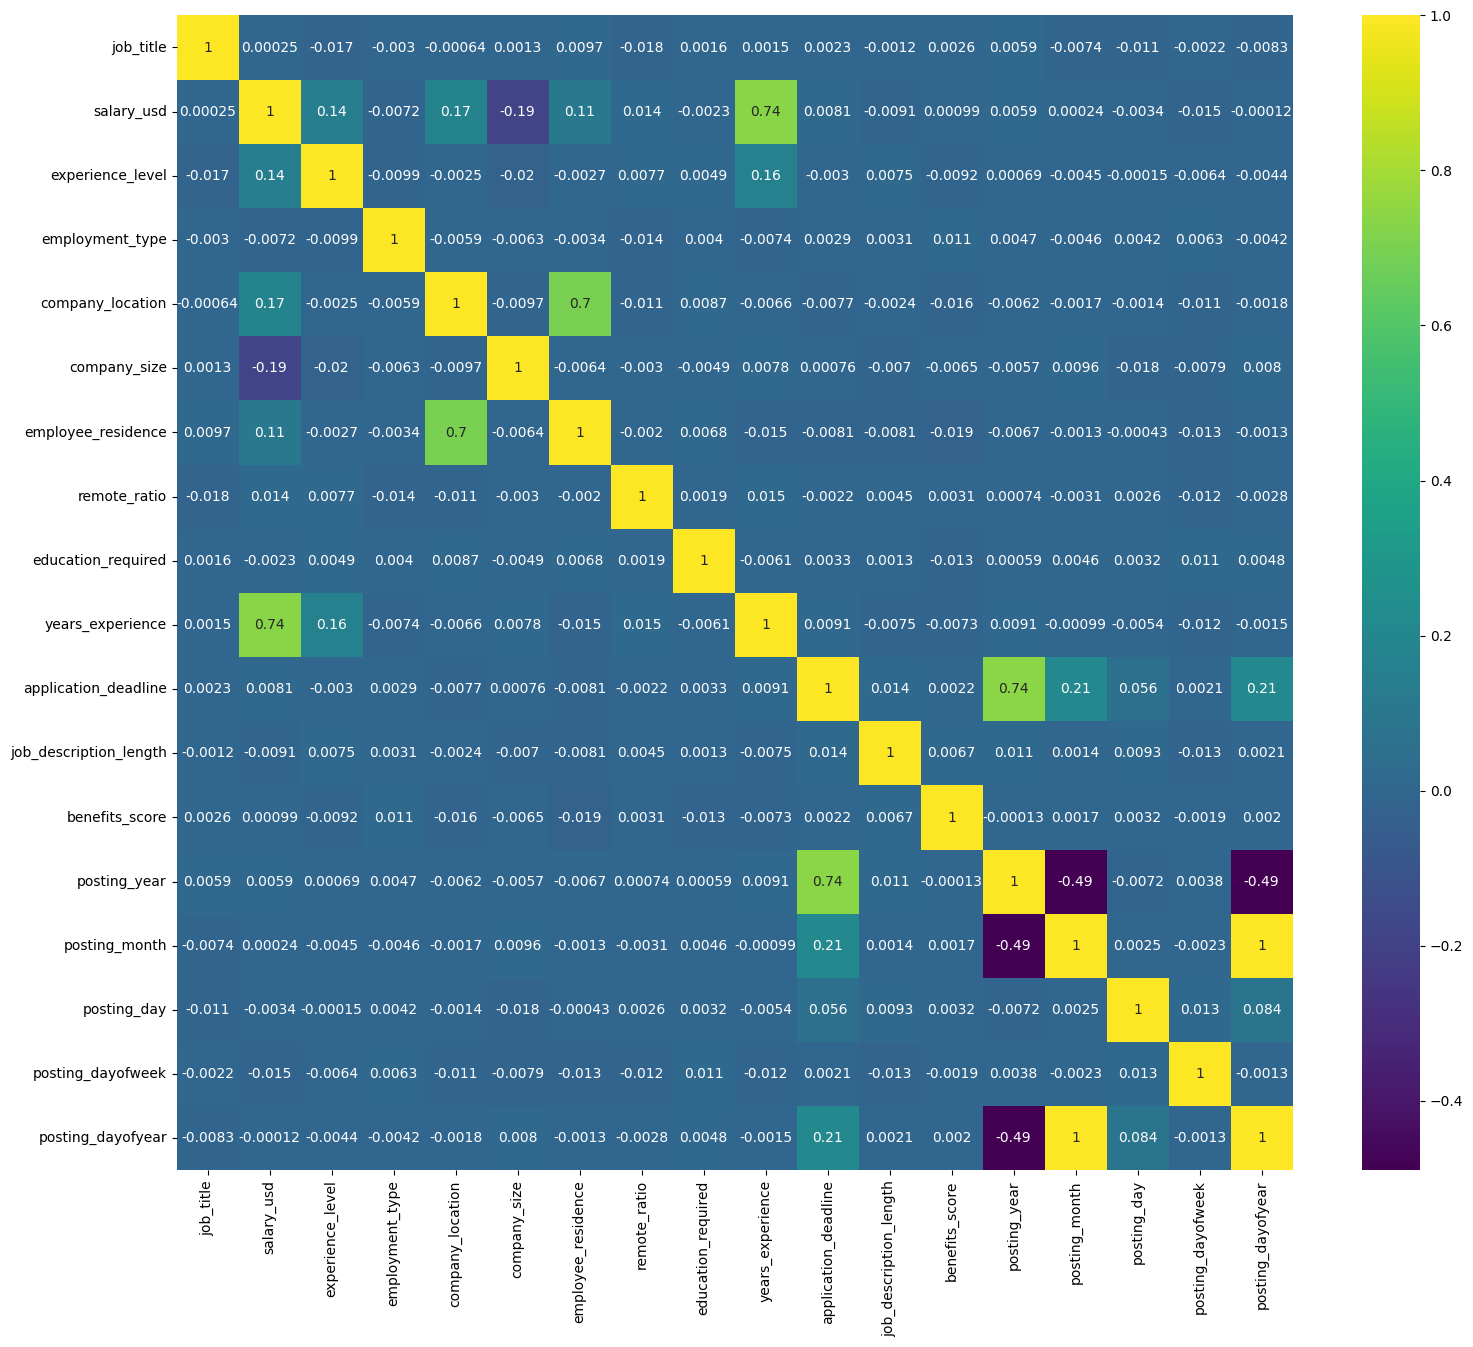

In [18]:
corr = df.corr()
plt.figure(figsize=(18, 15))
sns.heatmap(corr,annot=True,cmap="viridis")

In [19]:
threshold = 0.02

high_corr_feature = corr.index[abs(corr["salary_usd"]) > threshold].tolist()
high_corr_feature.remove("salary_usd")
print(high_corr_feature)

['experience_level', 'company_location', 'company_size', 'employee_residence', 'years_experience']


In [20]:
X = df[high_corr_feature]
y = df["salary_usd"]

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=0)

In [22]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 1. تدريب النموذج
regr = LinearRegression()
regr.fit(X_train_scaled, y_train)

# 2. التنبؤ
y_pred = regr.predict(X_test_scaled)
y_train_pred = regr.predict(X_train_scaled)

# 3. حساب R² (الدقة)
train_acc = r2_score(y_train, y_train_pred)
test_acc = r2_score(y_test, y_pred)
print(f"Train R² Score: {train_acc:.4f}")
print(f"Test  R² Score: {test_acc:.4f}")




Train R² Score: 0.6116
Test  R² Score: 0.6312


In [42]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

knn_regr = KNeighborsRegressor(n_neighbors=5)
knn_regr.fit(X_train_scaled, y_train)

y_pred = knn_regr.predict(X_test_scaled)

test_acc = r2_score(y_test, y_pred)
print("test_acc", test_acc)

train_acc = knn_regr.score(X_train_scaled, y_train)
print("train_acc", train_acc)

train_loss = mean_squared_error(y_train, knn_regr.predict(X_train_scaled))
test_loss = mean_squared_error(y_test, y_pred)
print("mean sq_train", train_loss)
print("mean sq_test", test_loss)

test_acc 0.811760223996969
train_acc 0.8756550254419059
mean sq_train 450349620.9605051
mean sq_test 693111258.2079288


In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

score_list = []

for k in range(1, 50, 2):
    knn_regr = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn_regr, X_train_scaled, y_train, cv=10, scoring='r2')  
    mean_score = scores.mean().round(2)
    score_list.append(mean_score)
    print(f"k = {k:<2}     Score = {mean_score}")

k = 1      Score = 0.72
k = 3      Score = 0.8
k = 5      Score = 0.82
k = 7      Score = 0.82
k = 9      Score = 0.82
k = 11     Score = 0.81
k = 13     Score = 0.81
k = 15     Score = 0.8
k = 17     Score = 0.8
k = 19     Score = 0.79
k = 21     Score = 0.78
k = 23     Score = 0.78
k = 25     Score = 0.77
k = 27     Score = 0.77
k = 29     Score = 0.77
k = 31     Score = 0.76
k = 33     Score = 0.76
k = 35     Score = 0.76
k = 37     Score = 0.76
k = 39     Score = 0.76
k = 41     Score = 0.76
k = 43     Score = 0.75
k = 45     Score = 0.75
k = 47     Score = 0.75
k = 49     Score = 0.75


In [26]:
model = DecisionTreeRegressor(
    criterion='squared_error',  
    max_depth=8,
    min_samples_split=2,
    random_state=2
)

model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=8, random_state=2)

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)

print("R² Score:", r2)

R² Score: 0.8749145754451424


In [28]:
model.get_depth()


8

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# 1. تعريف بارامترات البحث
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# 2. إنشاء موديل Gradient Boost
gbr = GradientBoostingRegressor(random_state=42)

# 3. عمل Grid Search
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# 4. التدريب على بيانات التدريب
grid_search.fit(X_train_scaled, y_train)

# 5. أفضل موديل
best_gbr = grid_search.best_estimator_

print("✅ GradientBoostingRegressor best para:")
print(grid_search.best_params_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
✅ GradientBoostingRegressor best para:
{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 200}


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# 1. تدريب النموذج
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train_scaled, y_train)

# 2. التنبؤ
y_pred = rfr.predict(X_test_scaled)
y_train_pred = rfr.predict(X_train_scaled)

# 3. تقييم النموذج
print("RandomForestRegressor:")
print(f"Train R²: {r2_score(y_train, y_train_pred):.4f}")
print(f"Test  R²: {r2_score(y_test, y_pred):.4f}")
print(f"Train MSE: {mean_squared_error(y_train, y_train_pred):.2f}")
print(f"Test  MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Train MAE: {mean_absolute_error(y_train, y_train_pred):.2f}")
print(f"Test  MAE: {mean_absolute_error(y_test, y_pred):.2f}")


RandomForestRegressor:
Train R²: 0.9320
Test  R²: 0.8643
Train MSE: 246274254.23
Test  MSE: 499772202.64
Train MAE: 10875.80
Test  MAE: 15717.26


In [33]:
from sklearn.ensemble import StackingRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

base_models = [
    ('gbr', GradientBoostingRegressor()),
    ('knn', KNeighborsRegressor()),
    ('dt', DecisionTreeRegressor()),
    ("rh",RandomForestRegressor())
]

final_model = LinearRegression()

stack_model = StackingRegressor(
    estimators=base_models,
    final_estimator=final_model,
    cv=5
)

stack_model.fit(X_train_scaled, y_train)

y_pred_stack = stack_model.predict(X_test_scaled)
y_train_pred_stack = stack_model.predict(X_train_scaled)

print("\nStacking Regressor:")
print(f"Train R²: {r2_score(y_train, y_train_pred_stack):.4f}")
print(f"Test  R²: {r2_score(y_test, y_pred_stack):.4f}")
print(f"Train MSE: {mean_squared_error(y_train, y_train_pred_stack):.2f}")
print(f"Test  MSE: {mean_squared_error(y_test, y_pred_stack):.2f}")
print(f"Train MAE: {mean_absolute_error(y_train, y_train_pred_stack):.2f}")
print(f"Test  MAE: {mean_absolute_error(y_test, y_pred_stack):.2f}")



Stacking Regressor:
Train R²: 0.8968
Test  R²: 0.8821
Train MSE: 373757493.41
Test  MSE: 434088706.58
Train MAE: 13905.42
Test  MAE: 15014.81


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# 1. تعريف بارامترات البحث
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# 2. إنشاء موديل Gradient Boost
gbr = GradientBoostingRegressor(random_state=42)

# 3. عمل Grid Search
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# 4. التدريب على بيانات التدريب
grid_search.fit(X_train_scaled, y_train)

# 5. أفضل موديل
best_gbr = grid_search.best_estimator_

print("✅ GradientBoostingRegressor bes:")
print(grid_search.best_params_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
✅ أفضل بارامترات لـ GradientBoostingRegressor:
{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 200}


In [36]:
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 1. النماذج الأساسية
base_models = [
    ('gbr', best_gbr),  # استخدم النسخة المحسنة هنا
    ('knn', KNeighborsRegressor()),
    ('dt', DecisionTreeRegressor())
]

# 2. meta learner
final_model = LinearRegression()

# 3. بناء stacking model
stack_model = StackingRegressor(
    estimators=base_models,
    final_estimator=final_model,
    cv=5
)

# 4. تدريب stacking
stack_model.fit(X_train_scaled, y_train)

# 5. التنبؤ والتقييم
y_pred_stack = stack_model.predict(X_test_scaled)
y_train_pred_stack = stack_model.predict(X_train_scaled)

print("\n🔁 Stacking Regressor (with GridSearch-tuned GBR):")
print(f"Train R²: {r2_score(y_train, y_train_pred_stack):.4f}")
print(f"Test  R²: {r2_score(y_test, y_pred_stack):.4f}")
print(f"Train MSE: {mean_squared_error(y_train, y_train_pred_stack):.2f}")
print(f"Test  MSE: {mean_squared_error(y_test, y_pred_stack):.2f}")
print(f"Train MAE: {mean_absolute_error(y_train, y_train_pred_stack):.2f}")
print(f"Test  MAE: {mean_absolute_error(y_test, y_pred_stack):.2f}")



🔁 Stacking Regressor (with GridSearch-tuned GBR):
Train R²: 0.8894
Test  R²: 0.8855
Train MSE: 400492035.16
Test  MSE: 421668482.78
Train MAE: 14414.83
Test  MAE: 14819.09
